In [1]:
########## pip install's ###########
!pip install cmake face_recognition numpy opencv-python
####################################

In [2]:
######## For Hackintosh with ryzen processor ####
!export MKL_DEBUG_CPU_TYPE=5
#################################################

In [3]:
import face_recognition as fr 
import cv2
import os, shutil
import numpy as np
from cv2_plt_imshow import cv2_plt_imshow
from IPython.display import Image

In [4]:
def get_encoded_faces():
    encoded = {}
    for dirpath, dname, fname in os.walk('./faces'):
        for f in fname:
            if f.endswith('.jpg') or f.endswith('.png'):
                face = fr.load_image_file('faces/' + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split('.')[0]] = encoding
    return encoded

In [5]:
x = get_encoded_faces()

In [6]:
x

{'donald trump': array([-0.09608134,  0.16868418,  0.0497227 , -0.04582981, -0.10136342,
         0.04679317,  0.02095078, -0.1764912 ,  0.12018435, -0.08864281,
         0.18152976, -0.01729183, -0.34602433, -0.12106197, -0.0237564 ,
         0.15144597, -0.10695484, -0.15656155, -0.16881055, -0.13122195,
         0.00409347,  0.03099601, -0.05229793, -0.02755668, -0.14032911,
        -0.24503456, -0.04643239, -0.02885608,  0.01542001, -0.08382874,
         0.05345022,  0.0557139 , -0.24174955, -0.04053322, -0.01281708,
         0.10893641, -0.13246264, -0.08761974,  0.15858291, -0.00108275,
        -0.12717731,  0.02165243,  0.01301039,  0.20401874,  0.17082106,
        -0.04602037,  0.02881165, -0.08739354,  0.13882719, -0.21260686,
        -0.03302894,  0.19953334,  0.10865252,  0.14662428,  0.02394883,
        -0.11385123,  0.01875086,  0.17546308, -0.17310372,  0.04283649,
         0.05025966, -0.25900999, -0.05842374, -0.07654959,  0.06586104,
         0.03993079, -0.05439585, -

In [7]:
def classify_face(im):
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_name = list(faces.keys())
    
    img = cv2.imread(im)
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)
    
    face_names = []  
    for face_encoding in unknown_face_encodings:
        name = 'Unknown'
        matchs = fr.compare_faces(faces_encoded, face_encoding)
        
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matchs[best_match_index]:
            name = known_face_name[best_match_index]
            
        face_names.append(name)
        
        for(top, right, bottom, left), name in zip(face_locations, face_names):
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (25,0,0), 2)
            cv2.rectangle(img, (left-20, bottom-15), (right+20, bottom+20), (25,0,0), cv2.FILLED)
            cv2.putText(img, name,(left-20, bottom+15), cv2.FONT_HERSHEY_DUPLEX, 0.5, (255,255,255), 1)
    
    while True:
#         cv2.imshow('image',img)
#         cv2.waitKey(0)
        cv2_plt_imshow(img)
        return face_names
        
        
            
    

['papu', 'modi']

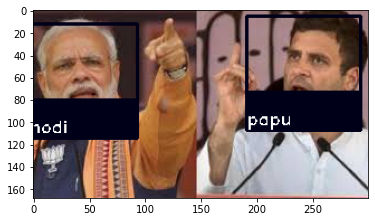

In [10]:
classify_face("test/test5.jpg")
